# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Dennis Dibbern

Datum: 16.11.2023

Gruppe: 31

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Lässt sich das Newton´sche Abkühlungsgesetz an einem Alltagsbeispiel nachweisen? Stimmen physikalische Erwartung und Realität überein?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


Materialen: 
-	Heißes Getränk
-	Zwei Temperatursensoren
-	Pi mit Auswerungssoftware


Durchführung:
Ein Temperatursensor misst die Temperatur des Getränks, der andere misst die Umgebungstemperatur. Nun wird über einen Zeitraum von ca. 10 min der Temperaturverlauf des heißen Getränks gemessen.


![Versuchsaufbau Newton](figures/Versuch_Newton_1.jpeg)

## Versuchsauswertung

In [8]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib
import h5py as h5
# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [9]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
path_hdf5 = 'data/data_newton/data_newton.h5'
path_data = 'data/data_newton'

# DONE #

In [10]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
f = h5.File(path_hdf5, 'r')
g = f["RawData"]
RawData = g["RawData"]
created = f.attrs["created"]
group_number = f.attrs["group_number"]
authors = f.attrs["authors"]
experiment = f.attrs["experiment"]
uuids_list = list(RawData.keys())
print(uuids_list)
path_sensor_1 = "RawData/RawData/"+uuids_list[0]
path_sensor_2 = "RawData/RawData/"+uuids_list[1]

sensor_1 = f[path_sensor_1]
sensor_2 = f[path_sensor_2]

temp_1 = list(sensor_1["temperature"])
temp_2 = list(sensor_2["temperature"])
time_1 = list(sensor_1["time step"])
time_2 = list(sensor_2["time step"])
# DONE #

['1ee7fb5c-fff6-64bd-85c3-1f77c7b417cc', '1ee7fb6d-13df-6b3f-ac90-2dcffab77480']


#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

Text(0, 0.5, 'temperature in °C (log)')

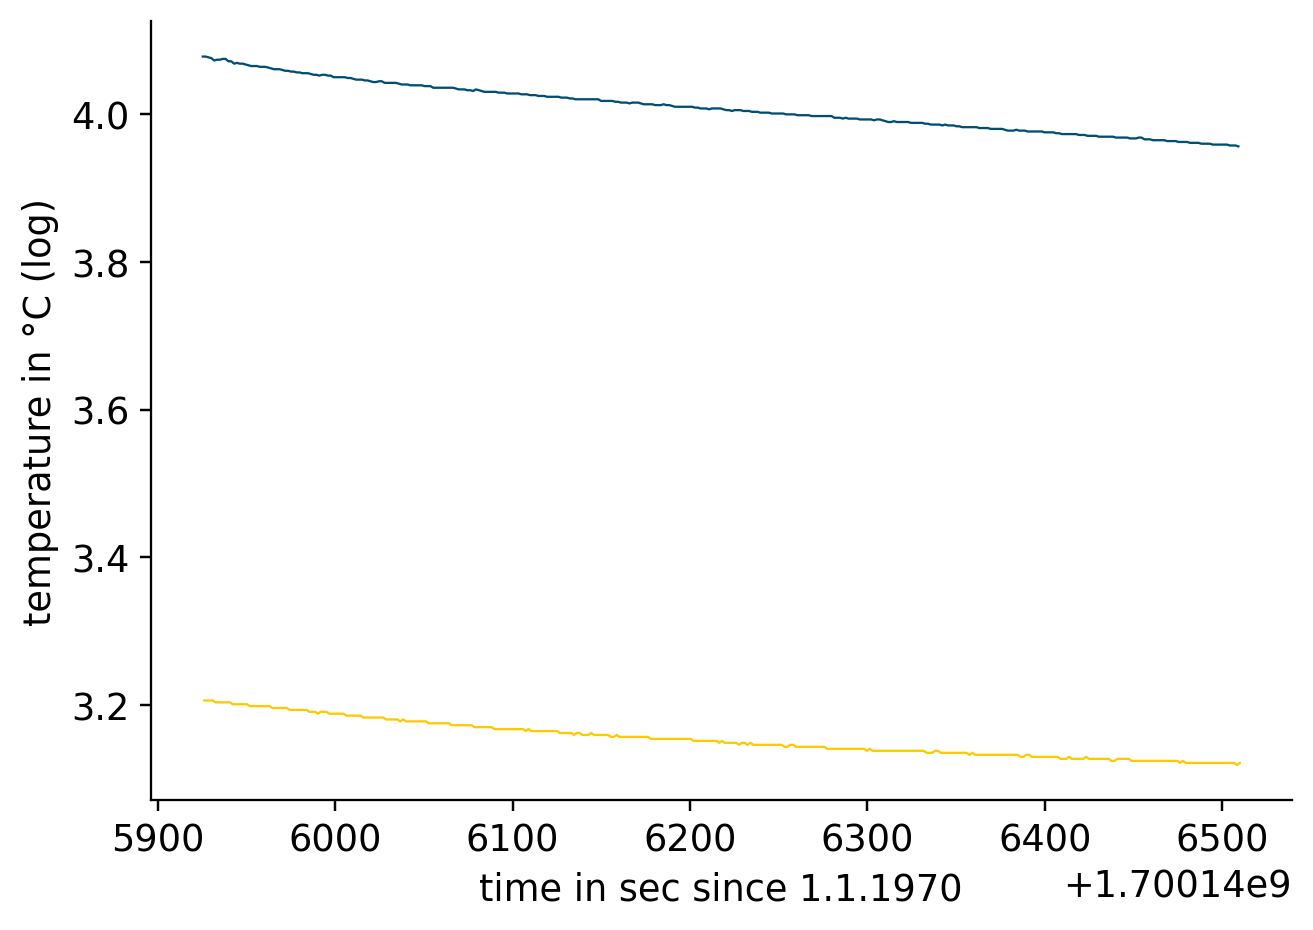

In [11]:
# TODO: Use the temperature and time data for plotting
fig = plt.figure()

plt.plot(time_1, np.log(temp_1))
plt.plot(time_2, np.log(temp_2))

#plt.plot(time_1, temp_1)
#plt.plot(time_2, temp_2)

plt.xlabel("time in sec since 1.1.1970")
plt.ylabel("temperature in °C (log)")

# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [12]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz
T_1 = temp_1[0]
T_2 = temp_1[-1]

print(T_1, T_2)

#y = np.log((temp_1-T_2)/(T_1-T_2))      
k = np.polyfit(time_1, temp_1-T_2,0)

# DONE #

59.0 52.25


#### (iV) Ergebnis

In [13]:
# TODO: Print result
print(k)

# DONE #

[2.84828767]


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Das Newtonsche Abkühlungsgesetz besagt, dass die Wärmeverlustrate eines Körpers direkt proportional zum Temperaturunterschied zwischen dem Körper und seiner Umgebung ist. Dies wollte ich zeigen, indem ein konstanter Wert für die Konstante k herauskommt. Da dies auch geklappt hat, wurde das Newtonsche Abkühlungsgesetz somit bestätigt. Auch im Plot kann man eine Proportionalität zwischen Temperaturabnahme und Umgebungstemperatur erkennen, was ich als Bestätigung für den Erfolg des Versuchs interpretieren würde.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Der Versuch zum Newtoschen Gesetz hat gut funktioniert, und meine Erwartungen wurden erfüllt. Ich habe gelernt mit den Sensoren und dem Pi umzugehen, eine Messdatenaufnahmesoftware zu schreiben und mit Metadaten umzugehen. Allerdings möchte ich an dieser Stelle auch gerne sagen, dass diese gesamte Abgabe ein wirklich sehr großer Aufwand war und es mir ohne HelpDesk sehr schwer gefallen wäre. Ein paar Beispiele oder Codeschnispel zur Orientierung (wie in der Lerneinheit 1) wären sehr hilfreich gewesen. 